# Zadanie 1
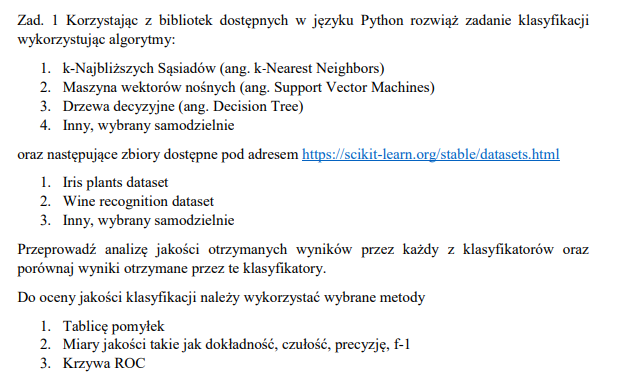

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15



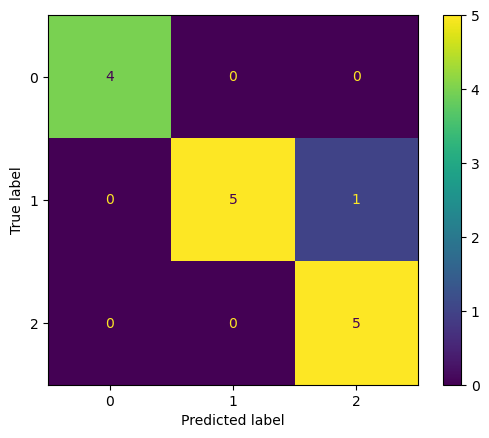

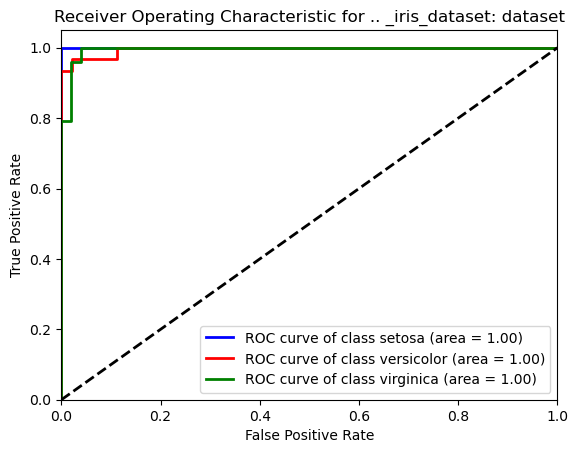

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.80      0.80      0.80         5
           2       1.00      0.86      0.92         7

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.88        18
weighted avg       0.90      0.89      0.89        18



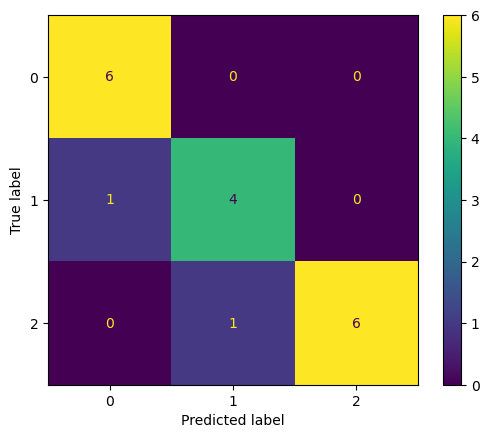

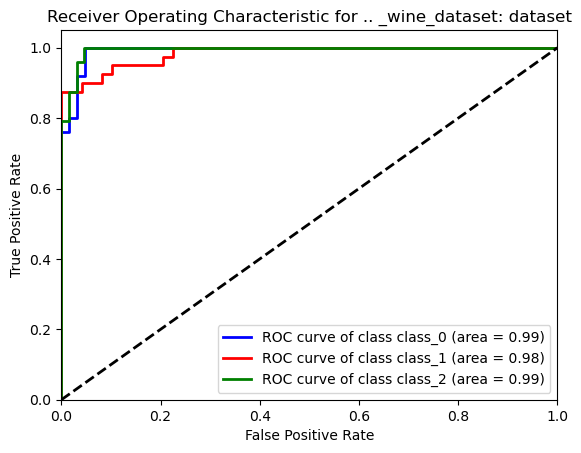

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        29

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



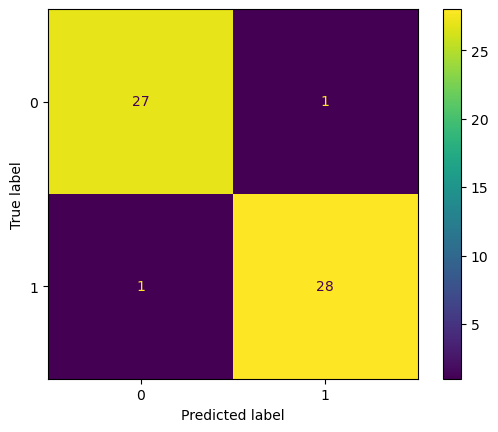

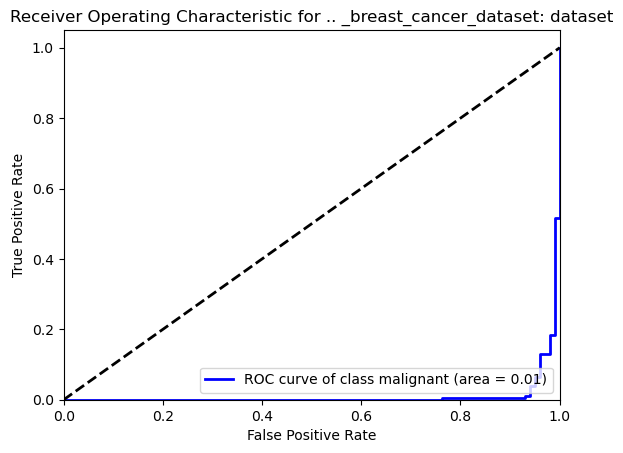

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def show_confusion_matrix(Y_test, Y_pred, labels):
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()

def show_roc(dataset, classification_algorithm_name):
    X = dataset.data
    y = dataset.target
    target_names = dataset.target_names

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    # Binarize the target classes
    Y_test = label_binarize(y_test, classes=np.unique(y))
    n_classes = Y_test.shape[1]


    if classification_algorithm_name == "knn":
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(X_train, y_train)
    elif classification_algorithm_name == "svm":
        clf = svm.SVC(kernel='linear', C=1.0, random_state=0, probability=True)
        clf.fit(X_train, y_train)
    elif classification_algorithm_name == "dt":
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(X_train, y_train)
    elif classification_algorithm_name == "nb":
        clf = GaussianNB()
        clf.fit(X_train, y_train)


    # Predict the test set probabilities
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(target_names[i], roc_auc[i]))

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)

    # Set plot parameters
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {0} dataset'.format(dataset['DESCR'].split('\n')[0]))
    plt.legend(loc="lower right")
    plt.show()



def apply_knearest_neighbours_to_dataset(dataset):
    X = dataset.data[:, :2]
    Y = dataset.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

    # precission - precyzja
    # recall - czułość
    # accuracy - dokładność
    # f1 - kombinacja precyzji i czułości
    target_names = [str(x) for x in knn.classes_]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # ROC curve
    show_roc(dataset, "knn")

def apply_svm_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = svm.SVC(kernel='linear', C=1.0, random_state=0, probability=True)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset, "svm")

def apply_decision_tree_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset, "dt")

def apply_naive_bayes_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset, "nb")


iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()

# print("K-Nearest neighbours")
# apply_knearest_neighbours_to_dataset(iris)
# apply_knearest_neighbours_to_dataset(wine)
# apply_knearest_neighbours_to_dataset(breast_cancer)

print("SVM")
apply_svm_to_dataset(iris)
apply_svm_to_dataset(wine)
apply_svm_to_dataset(breast_cancer)

# print("Decision Trees")
# apply_decision_tree_to_dataset(iris)
# apply_decision_tree_to_dataset(wine)
# apply_decision_tree_to_dataset(breast_cancer)

# print("Gaussian Naive Bayes")
# apply_naive_bayes_to_dataset(iris)
# apply_naive_bayes_to_dataset(wine)
# apply_naive_bayes_to_dataset(breast_cancer)



# Zadanie 2

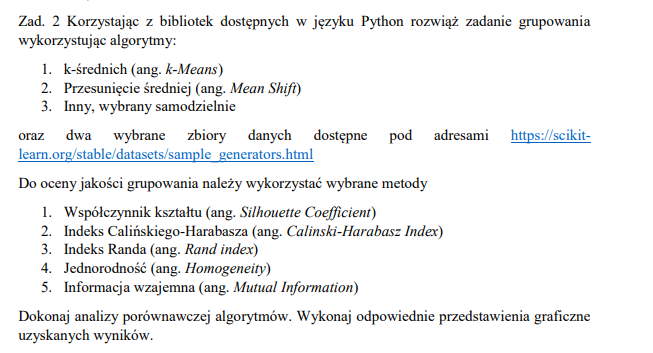

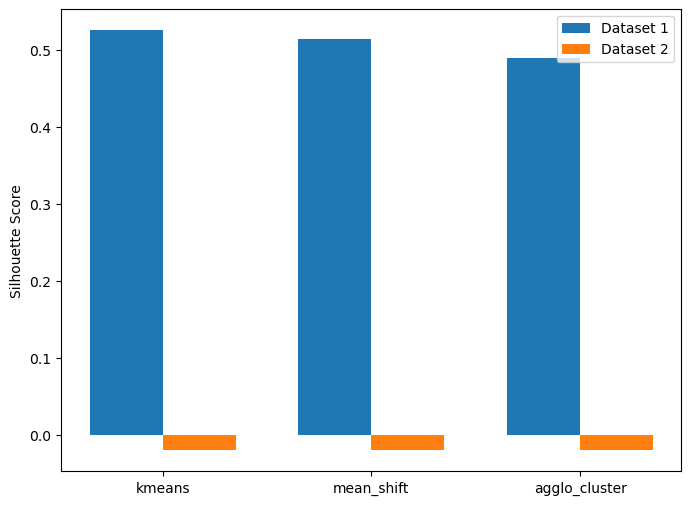

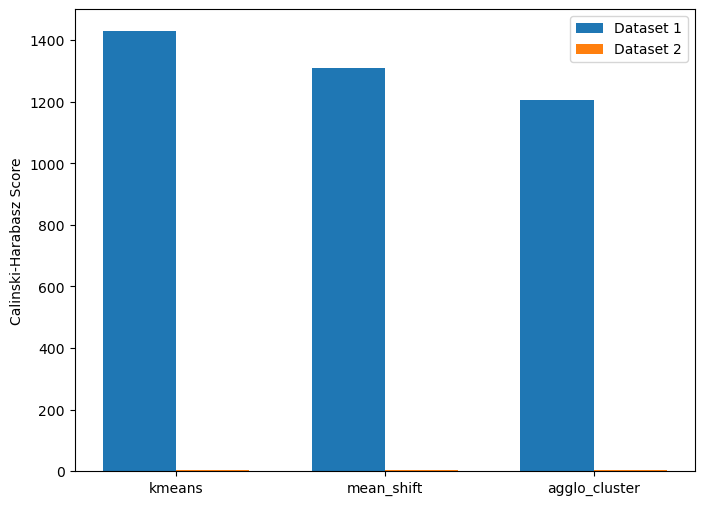

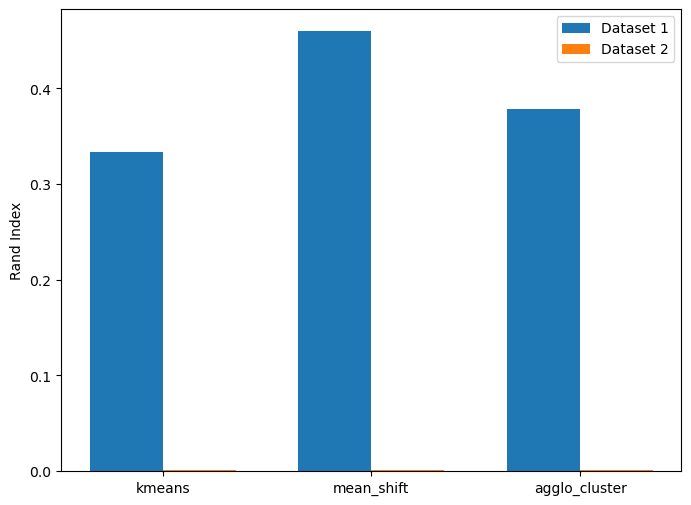

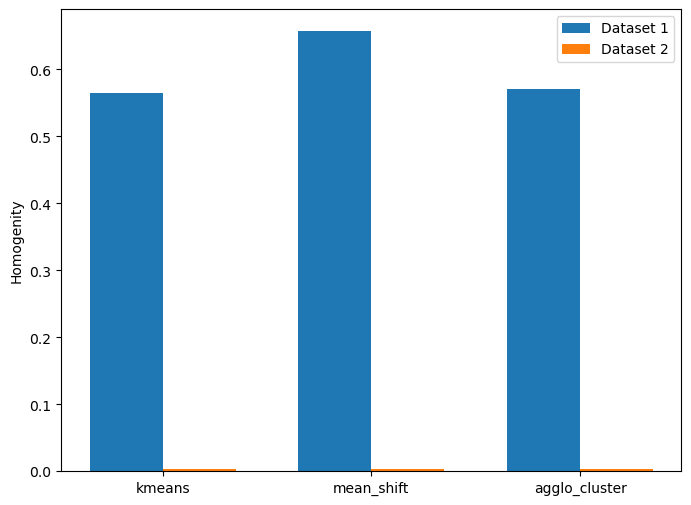

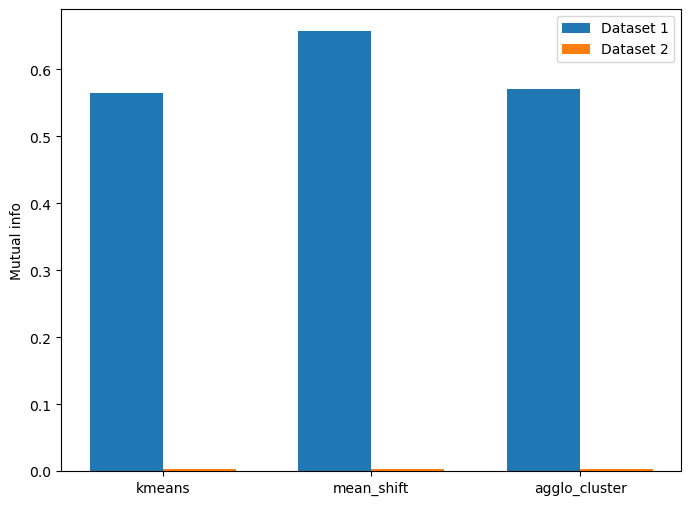

In [1]:
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
import numpy as np


def generate_first_dataset():
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, random_state=42)
    return X, y

def generate_second_dataset():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
    return X, y

def test_clustering(X, y_train, y_pred):
    score1 = silhouette_score(X, y_pred)
    # print('Silhouette coefficient:', score1)
    score2 = calinski_harabasz_score(X, y_pred)
    # print('Calinski-Harabasz score:', score2)
    score3 = adjusted_rand_score(y_train, y_pred)
    # print('Rand index:', score3)
    score4 = homogeneity_score(y_train, y_pred)
    # print('Homogeneity score:', score4)
    score5 = adjusted_mutual_info_score(y_train, y_pred)
    # print('Mutual information score:', score5)
    return {
        "silhouette": score1,
        "calinski_harabasz": score2,
        "rand_index": score3,
        "homogenity": score4,
        "mutual_info": score5
    }


def apply_kmeans_to_data(X, y):
    # Defining the number of clusters
    k = 3

    # Creating the KMeans object and fitting the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # Retrieving the cluster centers and labels
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Plotting the data points with different colors based on their labels
    # colors = ['r', 'g', 'b']
    # for i in range(k):
    #     plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i])
    # plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')

    # # Adding labels and titles to the plot
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.title('K-Means Clustering')
    # plt.show()

    return labels

    # test_result = test_clustering(X, y, labels)
    # return test_result

    

def apply_meanshift_to_data(X, y):
    # Estimating the bandwidth parameter using the median of pairwise distances
    bandwidth = estimate_bandwidth(X, quantile=0.2)

    # Creating the Mean Shift object and fitting the data
    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift.fit(X)

    # Retrieving the cluster centers and labels
    centers = meanshift.cluster_centers_
    labels = meanshift.labels_

    # Plotting the data points with different colors based on their labels
    # colors = ['r', 'g', 'b', 'y', 'c', 'm']
    # for i in range(len(set(labels))):
    #     plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i % len(colors)])

    # # Adding labels and titles to the plot
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.title('Mean Shift Clustering')

    # # Displaying the plot
    # plt.show()

    return labels


def apply_algomerative_clustering_to_data(X, y):
    # Creating the Agglomerative Clustering object and fitting the data
    agglo = AgglomerativeClustering(n_clusters=3)
    agglo.fit(X)

    # Retrieving the labels
    labels = agglo.labels_

    # Plotting the data points with different colors based on their labels
    # colors = ['r', 'g', 'b', 'y', 'c', 'm']
    # for i in range(len(set(labels))):
    #     plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i % len(colors)])

    # # Adding labels and titles to the plot
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.title('Agglomerative Clustering')

    # # Displaying the plot
    # plt.show()

    return labels


X1, y1 = generate_first_dataset()
X2, y2 = generate_second_dataset()


# print("K-Means")
apply_kmeans_to_data(X1, y1)
apply_kmeans_to_data(X2, y2)

# print("MeanShift")
# apply_meanshift_to_data(X1, y1)
# apply_meanshift_to_data(X2, y2)

# print("Agglomerative clustering")
# apply_algomerative_clustering_to_data(X1, y1)
# apply_algomerative_clustering_to_data(X2, y2)

# visualization of testing results - shilhouette
kmeans_dataset1_labels = apply_kmeans_to_data(X1, y1)
kmeans_dataset2_labels = apply_kmeans_to_data(X2, y2)
dataset1_kmeans_shilhouette = test_clustering(X1, y1, kmeans_dataset1_labels)["silhouette"]
dataset2_kmeans_shilhouette = test_clustering(X1, y1, kmeans_dataset2_labels)["silhouette"]

meanshift_dataset1_labels = apply_meanshift_to_data(X1, y1)
meanshift_dataset2_labels = apply_meanshift_to_data(X2, y2)
dataset1_meanshift_silhouette = test_clustering(X1, y1, meanshift_dataset1_labels)["silhouette"]
dataset2_meanshift_silhouette = test_clustering(X1, y1, meanshift_dataset2_labels)["silhouette"]

agglo_dataset1_labels = apply_algomerative_clustering_to_data(X1, y1)
agglo_dataset2_labels = apply_algomerative_clustering_to_data(X2, y2)
dataset1_agglo_silhouette = test_clustering(X1, y1, agglo_dataset1_labels)["silhouette"]
dataset2_agglo_silhouette = test_clustering(X1, y1, agglo_dataset2_labels)["silhouette"]


clustering_algorithms = ["kmeans", "mean_shift", "agglo_cluster"]
silhouettes_dataset1 = [dataset1_kmeans_shilhouette, dataset1_meanshift_silhouette, dataset1_agglo_silhouette]
silhouettes_dataset2 = [dataset2_kmeans_shilhouette, dataset2_meanshift_silhouette, dataset2_agglo_silhouette]


label_locations = np.arange(len(clustering_algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(label_locations - width/2, silhouettes_dataset1, width, label='Dataset 1')
rects2 = ax.bar(label_locations + width/2, silhouettes_dataset2, width, label='Dataset 2')

ax.set_ylabel('Silhouette Score')
ax.set_xticks(label_locations)
ax.set_xticklabels(clustering_algorithms)
ax.legend()

plt.show()


# visualization of testing results - calinski-harabasz
dataset1_kmeans_calinski_harabasz = test_clustering(X1, y1, kmeans_dataset1_labels)["calinski_harabasz"]
dataset2_kmeans_calinski_harabasz = test_clustering(X1, y1, kmeans_dataset2_labels)["calinski_harabasz"]

meanshift_dataset1_labels = apply_meanshift_to_data(X1, y1)
meanshift_dataset2_labels = apply_meanshift_to_data(X2, y2)
dataset1_meanshift_calinski_harabasz = test_clustering(X1, y1, meanshift_dataset1_labels)["calinski_harabasz"]
dataset2_meanshift_calinski_harabasz = test_clustering(X1, y1, meanshift_dataset2_labels)["calinski_harabasz"]

agglo_dataset1_labels = apply_algomerative_clustering_to_data(X1, y1)
agglo_dataset2_labels = apply_algomerative_clustering_to_data(X2, y2)
dataset1_agglo_calinski_harabasz = test_clustering(X1, y1, agglo_dataset1_labels)["calinski_harabasz"]
dataset2_agglo_calinski_harabasz = test_clustering(X1, y1, agglo_dataset2_labels)["calinski_harabasz"]


clustering_algorithms = ["kmeans", "mean_shift", "agglo_cluster"]
calinski_harabasz_dataset1 = [dataset1_kmeans_calinski_harabasz, dataset1_meanshift_calinski_harabasz, dataset1_agglo_calinski_harabasz]
calinski_harabasz_dataset2 = [dataset2_kmeans_calinski_harabasz, dataset2_meanshift_calinski_harabasz, dataset2_agglo_calinski_harabasz]


label_locations = np.arange(len(clustering_algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(label_locations - width/2, calinski_harabasz_dataset1, width, label='Dataset 1')
rects2 = ax.bar(label_locations + width/2, calinski_harabasz_dataset2, width, label='Dataset 2')

ax.set_ylabel('Calinski-Harabasz Score')
ax.set_xticks(label_locations)
ax.set_xticklabels(clustering_algorithms)
ax.legend()
plt.show()

# visualization of testing results - rand index
dataset1_kmeans_rand_index = test_clustering(X1, y1, kmeans_dataset1_labels)["rand_index"]
dataset2_kmeans_rand_index = test_clustering(X1, y1, kmeans_dataset2_labels)["rand_index"]

meanshift_dataset1_labels = apply_meanshift_to_data(X1, y1)
meanshift_dataset2_labels = apply_meanshift_to_data(X2, y2)
dataset1_meanshift_rand_index = test_clustering(X1, y1, meanshift_dataset1_labels)["rand_index"]
dataset2_meanshift_rand_index = test_clustering(X1, y1, meanshift_dataset2_labels)["rand_index"]

agglo_dataset1_labels = apply_algomerative_clustering_to_data(X1, y1)
agglo_dataset2_labels = apply_algomerative_clustering_to_data(X2, y2)
dataset1_agglo_rand_index = test_clustering(X1, y1, agglo_dataset1_labels)["rand_index"]
dataset2_agglo_rand_index = test_clustering(X1, y1, agglo_dataset2_labels)["rand_index"]


clustering_algorithms = ["kmeans", "mean_shift", "agglo_cluster"]
rand_index_dataset1 = [dataset1_kmeans_rand_index, dataset1_meanshift_rand_index, dataset1_agglo_rand_index]
rand_index_dataset2 = [dataset2_kmeans_rand_index, dataset2_meanshift_rand_index, dataset2_agglo_rand_index]


label_locations = np.arange(len(clustering_algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(label_locations - width/2, rand_index_dataset1, width, label='Dataset 1')
rects2 = ax.bar(label_locations + width/2, rand_index_dataset2, width, label='Dataset 2')

ax.set_ylabel('Rand Index')
ax.set_xticks(label_locations)
ax.set_xticklabels(clustering_algorithms)
ax.legend()
plt.show()

# visualization of testing results - homogenity
dataset1_kmeans_homogenity = test_clustering(X1, y1, kmeans_dataset1_labels)["homogenity"]
dataset2_kmeans_homogenity = test_clustering(X1, y1, kmeans_dataset2_labels)["homogenity"]

meanshift_dataset1_labels = apply_meanshift_to_data(X1, y1)
meanshift_dataset2_labels = apply_meanshift_to_data(X2, y2)
dataset1_meanshift_homogenity = test_clustering(X1, y1, meanshift_dataset1_labels)["homogenity"]
dataset2_meanshift_homogenity = test_clustering(X1, y1, meanshift_dataset2_labels)["homogenity"]

agglo_dataset1_labels = apply_algomerative_clustering_to_data(X1, y1)
agglo_dataset2_labels = apply_algomerative_clustering_to_data(X2, y2)
dataset1_agglo_homogenity = test_clustering(X1, y1, agglo_dataset1_labels)["homogenity"]
dataset2_agglo_homogenity = test_clustering(X1, y1, agglo_dataset2_labels)["homogenity"]


clustering_algorithms = ["kmeans", "mean_shift", "agglo_cluster"]
homogenity_dataset1 = [dataset1_kmeans_homogenity, dataset1_meanshift_homogenity, dataset1_agglo_homogenity]
homogenity_dataset2 = [dataset2_kmeans_homogenity, dataset2_meanshift_homogenity, dataset2_agglo_homogenity]


label_locations = np.arange(len(clustering_algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(label_locations - width/2, homogenity_dataset1, width, label='Dataset 1')
rects2 = ax.bar(label_locations + width/2, homogenity_dataset2, width, label='Dataset 2')

ax.set_ylabel('Homogenity')
ax.set_xticks(label_locations)
ax.set_xticklabels(clustering_algorithms)
ax.legend()
plt.show()


# visualization of testing results - mutual info
dataset1_kmeans_mutual_info = test_clustering(X1, y1, kmeans_dataset1_labels)["mutual_info"]
dataset2_kmeans_mutual_info = test_clustering(X1, y1, kmeans_dataset2_labels)["mutual_info"]

meanshift_dataset1_labels = apply_meanshift_to_data(X1, y1)
meanshift_dataset2_labels = apply_meanshift_to_data(X2, y2)
dataset1_meanshift_mutual_info = test_clustering(X1, y1, meanshift_dataset1_labels)["mutual_info"]
dataset2_meanshift_mutual_info = test_clustering(X1, y1, meanshift_dataset2_labels)["mutual_info"]

agglo_dataset1_labels = apply_algomerative_clustering_to_data(X1, y1)
agglo_dataset2_labels = apply_algomerative_clustering_to_data(X2, y2)
dataset1_agglo_mutual_info = test_clustering(X1, y1, agglo_dataset1_labels)["mutual_info"]
dataset2_agglo_mutual_info = test_clustering(X1, y1, agglo_dataset2_labels)["mutual_info"]


clustering_algorithms = ["kmeans", "mean_shift", "agglo_cluster"]
mutual_info_dataset1 = [dataset1_kmeans_homogenity, dataset1_meanshift_homogenity, dataset1_agglo_homogenity]
mutual_info_dataset2 = [dataset2_kmeans_homogenity, dataset2_meanshift_homogenity, dataset2_agglo_homogenity]


label_locations = np.arange(len(clustering_algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(label_locations - width/2, mutual_info_dataset1, width, label='Dataset 1')
rects2 = ax.bar(label_locations + width/2, mutual_info_dataset2, width, label='Dataset 2')

ax.set_ylabel('Mutual info')
ax.set_xticks(label_locations)
ax.set_xticklabels(clustering_algorithms)
ax.legend()
plt.show()






# Zadanie 3
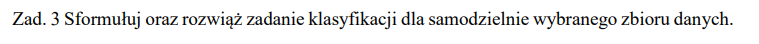

c:\Users\wdomc\anaconda3\envs\minbd\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        98
           1       0.89      0.83      0.86       107

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



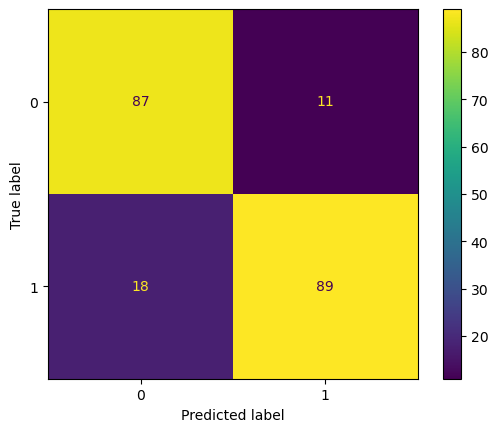

In [2]:
# classifying heart diseases

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def show_confusion_matrix(Y_test, Y_pred, labels):
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()


df = pd.read_csv("archive/heart.csv")

# checking population of patients with and without a heart disease
df.target.value_counts()
sick_patients = len(df[df.target == 0])
healthy_patients = len(df[df.target == 1])

y = df.target.values
labels = ["sick", "healthy"]
x_data = df.drop(['target'], axis = 1)

# data normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
Y_pred = classifier.predict(x_test)


show_confusion_matrix(y_test, Y_pred, classifier.classes_)
target_names = [str(x) for x in classifier.classes_]
print(classification_report(y_test, Y_pred, target_names=target_names))







